## CIFAR-10

The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets contains 10,000 images.

I choose Keras as my deep learning framework since it is begginer friendly and it is what we mainly use in our textbook.

The challenge is to recognize previously unseen images and assign them to one of the 10 classes.

### Import Data

We are going to import data directly from the Keras datasets. First, divide the dataset into train data, validation data and test data.

In [7]:
from tensorflow.keras.datasets import cifar10
import seaborn as sns

(X_train_full, y_train_full), (X_test, y_test)=cifar10.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

print('Shape of X_train is {}'.format(X_train.shape))
print('Shape of X_valid is {}'.format(X_valid.shape))
print('Shape of X_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_valid is {}'.format(y_valid.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of X_train is (45000, 32, 32, 3)
Shape of X_valid is (5000, 32, 32, 3)
Shape of X_test is (10000, 32, 32, 3)
Shape of y_train is (45000, 1)
Shape of y_valid is (5000, 1)
Shape of y_test is (10000, 1)


### Preprocessing Data

Before we start training, it's better to preprocess the data with normalization and one hot encoding.

For normalizing the pixel data, we can simply divide the whole pixel values with 255. Since pixel values ranges from 0-255, it will bring all the values in the data into a common scale 0-1.

CIFAR-10 has 10 categories, in general it's a good practice to label the categorical data using the one hot encoding. 

In [8]:
from tensorflow.keras.utils import to_categorical

# Normalization
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

# One hot encoding
y_train = to_categorical(y_train,10)
y_valid = to_categorical(y_valid,10)
y_test = to_categorical(y_test,10)

### Basic CNN Model

The first model I choose is a basic convolution neural network. CNN is proven very effective on image data. 

We will start with 3 convolutonal layers with the input shape of (32,32,3) and the activation function 'relu'. The first layer will have 32 filters, and the number of filters doubles as we climb up the CNN towards the output layer (32->64->128). A batch normalization is used in each layer to keep the input zero-centered and scaled. Each layer is attached to a maxpool layer. Max pooling is a great way to reduce the size of parameters with out loosing much information.

In order to avoid overfitting, we'll apply some regularization techniques as well. Here I choose to drop out some of the neural units randomly from our network. This forces the next layer to learn the patterns again, which will make our model more robust. The initial dropout rate is 0.2, and we'll increase the rate by 0.1 for each layer towards the output layer.

After 3 convolutional layers, we will flatten the intermediate results and pass them to a Dense network. Then the dense network result will be passed to a final output layer, where the number of units represent the number of categories in the data, which is 10 in our case. Softmax is chosen as final activation because we need the highest probable class out of 10. Finally we'll compile the model using adam optimizer.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.3))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))

# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history1 = model1.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6411 - accuracy: 0.4286 - val_loss: 1.1169 - val_accuracy: 0.6044
Epoch 2/50
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1178 - accuracy: 0.6064 - val_loss: 0.9430 - val_accuracy: 0.6652
Epoch 3/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.9295 - accuracy: 0.6765 - val_loss: 0.7812 - val_accuracy: 0.7268
Epoch 4/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.8215 - accuracy: 0.7171 - val_loss: 0.7752 - val_accuracy: 0.7350
Epoch 5/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.7497 - accuracy: 0.7426 - val_loss: 0.6558 - val_accuracy: 0.7726
Epoch 6/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.6824 - accuracy: 0.7680 - val_loss: 0.5968 - val_accuracy: 0.7960
Epoch 7/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6335 - accuracy: 0.7839 - val_loss: 0.5366 - val_accura

In [14]:
_, acc = model1.evaluate(X_valid, y_valid, verbose=0)
print('Accuracy: %.3f' % (acc * 100.0))

Accuracy: 86.700


<AxesSubplot:>

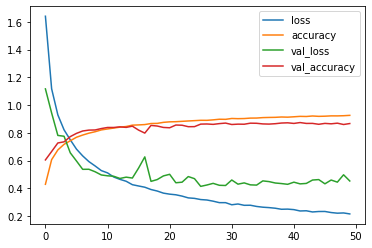

In [15]:
import pandas as pd
pd.DataFrame(history1.history).plot()

### AlexNet

The second architecture I use is the AlexNet architecture. The AlexNet CNN takes in data of 227 * 227 size, but the original image in the dataset has a relatively small size of 32 * 32. So the first step here will be resizing the image to 224 * 224 (7 times of orginal width/height). 

Then we can follow the steps in the paper to build our model. The author uses two regularization technieques to reduce overfitting: dropout and data augmentation. For augmentation, we'll make use of the `ImageDataGenerator` in tensorflow keras preprocessing library.

***For this model, sadly my laptop does't have enough RAM to run the resizing task. I'll leave the code here and skip this one.***

In [ ]:
from tensorflow.image import resize
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, ZeroPadding2D, Activation
from tensorflow.keras import models, optimizers
import numpy as np

# resize original data
X_train_alex, X_valid_alex = X_train_full[:-5000], X_train_full[-5000:]
X_train_resize = np.zeros((X_train_alex.shape[0], 224, 224, X_train_alex.shape[3]))
X_valid_resize = np.zeros((X_valid_alex.shape[0], 224, 224,X_valid_alex.shape[3]))

for i in range(X_train_alex.shape[0]):
    X_train_resize[i] = resize(X_train_alex[i],(224, 224))
    
for i in range(X_valid_alex.shape[0]):
    X_valid_resize[i] = resize(X_valid_alex[i],(224, 224))
    
# data augmentation
datagen = image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, rotation_range=20)
train_gen = datagen.flow(X_train_alex, y_train, batch_size=32)

# build model
inp = Input(shape=(224, 224, 3))

L1 = ZeroPadding2D((2, 2))(inp)
L1 = Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu')(L1)
L1 = MaxPooling2D((3, 3), strides=(2, 2))(L1)

L2 = Conv2D(256, (5, 5), activation='relu', padding='same')(L1)
L2 = MaxPooling2D((3, 3), strides=(2, 2))(L2)

L3 = Conv2D(384, (3, 3), activation='relu', padding='same')(L2)

L4 = Conv2D(384, (3, 3), activation='relu', padding='same')(L3)

L5 = Conv2D(256, (3, 3), activation='relu', padding='same')(L4)
L5 = MaxPooling2D((3, 3), strides=(2, 2))(L5)

fc = Flatten()(L5)

fc1 = Dense(4096)(fc)
fc1 = BatchNormalization()(fc1)
fc1 = Activation('relu')(fc1)
fc1 = Dropout(0.5)(fc1)

fc2 = Dense(4096)(fc1)
fc2 = BatchNormalization()(fc2)
fc2 = Activation('relu')(fc2)
fc2 = Dropout(0.5)(fc2)

pred = Dense(10)(fc2)
pred = BatchNormalization()(pred)
pred = Activation('softmax')(pred)

model2 = models.Model(inp, pred)

# compile model
opt = optimizers.Adam(learning_rate=0.01)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit_generator(train_gen, steps_per_epoch=45000/32, epochs=50, validation_data=(X_valid_alex, y_valid))


In [ ]:
_, acc = model2.evaluate(X_valid, y_valid, verbose=0)
print('Accuracy: %.3f' % (acc * 100.0))

In [ ]:
pd.DataFrame(history2.history).plot()

### VGGNet

The third architechture I want to try is VGG16. There are pre-trained weights on ImageNet, so I'll make use of it to do a transfer learing. For this model, I will apply data augmentation again for regularization. Also I will add a early stopping restriction to avoid overfitting.

In [17]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use VGG16 model, weights pre-trained on ImageNet.
vgg16_model = VGG16(weights='imagenet', include_top=False, classes=10, input_shape=(32,32,3))
model3 = Sequential()
for layer in vgg16_model.layers:
    model3.add(layer)

# Add hidden and output layers
model3.add(Flatten())
model3.add(Dense(512, activation='relu', name='hidden1'))
model3.add(Dropout(0.4))
model3.add(Dense(256, activation='relu', name='hidden2'))
model3.add(Dropout(0.4))
model3.add(Dense(10, activation='softmax', name='predictions'))
model3.summary()


# compile model
sgd = optimizers.SGD(learning_rate=0.001, momentum=0.9)

# For a multi-class classification problem
model3.compile(optimizer= sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# early stopping
es = EarlyStopping(patience=5, monitor='val_accuracy', mode='max')
mc = ModelCheckpoint('./weights.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# data augmentation
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.15, horizontal_flip=True, fill_mode="nearest")
train_gen = datagen.flow(X_train, y_train, batch_size=32)

# train the model
history3 = model3.fit(train_gen, steps_per_epoch=int(45000/32), epochs=30, callbacks=[es,mc], validation_data=(X_valid, y_valid))


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

In [18]:
_, acc = model3.evaluate(X_valid, y_valid, verbose=0)
print('Accuracy: %.3f' % (acc * 100.0))

Accuracy: 89.160


<AxesSubplot:>

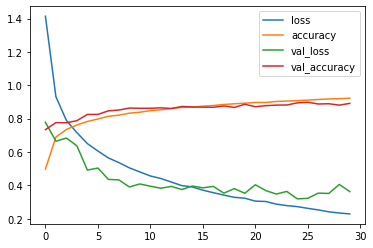

In [19]:
pd.DataFrame(history3.history).plot()

## ResNet

The last model I choose is the ResNet architecture. I'll implement a ResNet-34 to train the dataset. To achieve this, first we need to define a `ResidualUnit` layer, so that we can treat each residual unit as a single layer. Next, we can build the ResNet-34 simply using a `Sequential` model. Similar to the previous one, I will also add a early stopping restriction to avoid overfitting.

In [24]:
from tensorflow import keras
from tensorflow.keras.layers import Layer, Activation, MaxPool2D, GlobalAvgPool2D
from functools import partial
# from tensorflow.keras.layers import BatchNormalization, Flatten, Dense
# from tensorflow.keras.models import Sequential

DefaultConv2D = partial(Conv2D, kernel_size=3, strides=1, padding="SAME", use_bias=False)

class ResidualUnit(Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

model4 = Sequential()
model4.add(DefaultConv2D(64, kernel_size=7, strides=2, input_shape=[32, 32, 3]))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model4.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model4.add(GlobalAvgPool2D())
model4.add(Flatten())
model4.add(Dense(10, activation="softmax"))

model4.summary()

# early stopping
es = EarlyStopping(patience=5, monitor='val_accuracy', mode='max')
mc = ModelCheckpoint('./weights.h5', monitor='val_accuracy', save_best_only=True, mode='max')

sgd = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model4.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, steps_per_epoch=int(45000/32), epochs=30, callbacks=[es,mc], validation_data=(X_valid, y_valid))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 16, 16, 64)        9408      
_________________________________________________________________
batch_normalization_86 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
residual_unit_32 (ResidualUn (None, 8, 8, 64)          74240     
_________________________________________________________________
residual_unit_33 (ResidualUn (None, 8, 8, 64)          74240     
_________________________________________________________________
residual_unit_34 (ResidualUn (None, 8, 8, 64)        

NotImplementedError: Layer ResidualUnit has arguments in `__init__` and therefore must override `get_config`.

In [ ]:
_, acc = model4.evaluate(X_valid, y_valid, verbose=0)
print('Accuracy: %.3f' % (acc * 100.0))

In [ ]:
pd.DataFrame(history4.history).plot()

### Classify Test Dataset

Among the above four architectures, () got the highest accuracy. So we'll use this trained model to classify test dataset.

In [ ]:
_, acc = model.evaluate(X_test, y_test)
print('Accuracy: %.3f' % (acc * 100.0))